In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
raw_data = np.load('./data2d.npz')
X = raw_data['X']
y = raw_data['y']

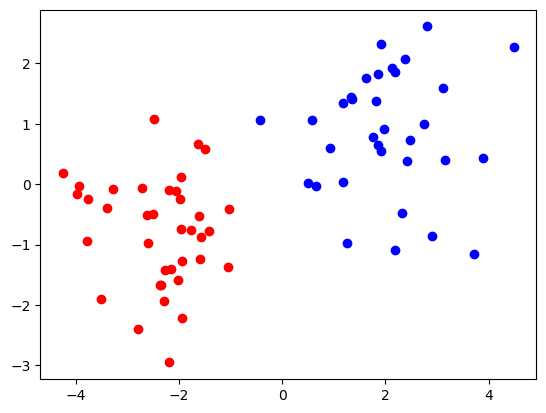

In [3]:
for i in range(len(y)):
    if y[i]:
        plt.scatter(X[i, 0], X[i, 1], c='r')
    else:
        plt.scatter(X[i, 0], X[i, 1], c='b')
plt.show()

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [5]:
def phi(W, X, b):
    return sigmoid((X @ W) + b)

In [6]:
def dL_dW(y_hat, y, X):
    return np.sum((y_hat - y) * X, axis=0) / len(y)

In [7]:
def dL_db(y_hat, y):
    return np.sum(y_hat - y, axis=0) / len(y)

In [8]:
W = np.random.rand(2, 1) * 0.1
b = 0

/Users/amirrezasokhankhosh/mambaforge/envs/data-science/lib/python3.10/site-packages/matplotlib/axes/_base.py:2539: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xys = np.asarray(xys)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

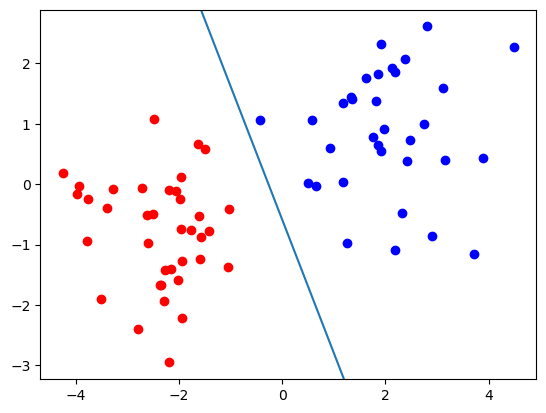

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

raw_data = np.load('./data2d.npz')
X = raw_data['X']
y = raw_data['y'].reshape((70, 1))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def phi(W, X, b):
    return sigmoid((X @ W) + b)

def dL_dW(y_hat, y, X):
    return (np.sum((y_hat - y) * X, axis=0) / len(y)).reshape((2, 1))

def dL_db(y_hat, y):
    return np.sum(y_hat - y, axis=0) / len(y)

def comput_loss(y_hat, y):
    return - np.sum((y * np.log(y_hat)) + (1-y)*np.log(1 - y_hat))

W = np.random.rand(2, 1) * 0.1
b = 0

learning_rate = 1e-2
epochs = 10000

losses = []
for i in range(epochs):
    y_hat = phi(W, X, b)
    loss = comput_loss(y_hat, y)
    losses.append(loss)
    dw = dL_dW(y_hat, y, X)
    db = dL_db(y_hat, y)
    W -= learning_rate * dw
    b -= learning_rate * db

for i in range(len(y)):
    if y[i]:
        plt.scatter(X[i, 0], X[i, 1], c='r')
    else:
        plt.scatter(X[i, 0], X[i, 1], c='b')


plt.axline((0.0, -b/W[1]), (-b/W[0], 0.0))
plt.show()
